In [7]:
import numpy as np
import slidingwindow as sw
import sys
import os

from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from mmcv.runner import load_checkpoint



# import shm_tools here
sys.path.append('..')
from shm_tools.shm_utils import imread, imwrite

In [2]:
# load checkpoint file and configuration 

config = './project_work_dirs/multiple_concrete_damage/mask_rcnn_x101_64x4d_fpn_1x_bilin.py'
checkpoint = './project_work_dirs/multiple_concrete_damage/epoch_48.pth'

device = 'cuda:0'
model = init_detector(config, checkpoint, device=device)




array([[4.1138376e+02, 3.4806046e+02, 5.8830859e+02, 4.2513672e+02,
        6.1807662e-01],
       [2.9153085e+02, 3.9725375e+02, 3.1593802e+02, 5.6430627e+02,
        9.9413730e-02],
       [3.2483826e+02, 3.3770175e+02, 5.2937024e+02, 4.0535571e+02,
        2.2913527e-01],
       [4.6915381e+02, 3.7351678e+02, 6.1297968e+02, 4.2479251e+02,
        7.7179581e-01],
       [2.9018561e+02, 5.8766577e+02, 3.1038867e+02, 7.4192902e+02,
        7.5538784e-02],
       [2.9067505e+02, 4.7931882e+02, 3.1216266e+02, 6.3719812e+02,
        1.4529203e-01],
       [2.9399313e+02, 3.4120557e+02, 4.3355121e+02, 4.0232977e+02,
        3.7967929e-01],
       [4.4961066e+02, 3.5560284e+02, 5.5385901e+02, 4.2039026e+02,
        2.2225679e-01],
       [2.9395053e+02, 3.7753693e+02, 3.1334863e+02, 4.9609113e+02,
        2.7809346e-01],
       [5.0664288e+02, 3.8280365e+02, 5.9076892e+02, 4.1966956e+02,
        5.6115068e-02],
       [3.2774838e+02, 3.4480042e+02, 4.0956781e+02, 3.9611499e+02,
        6.72

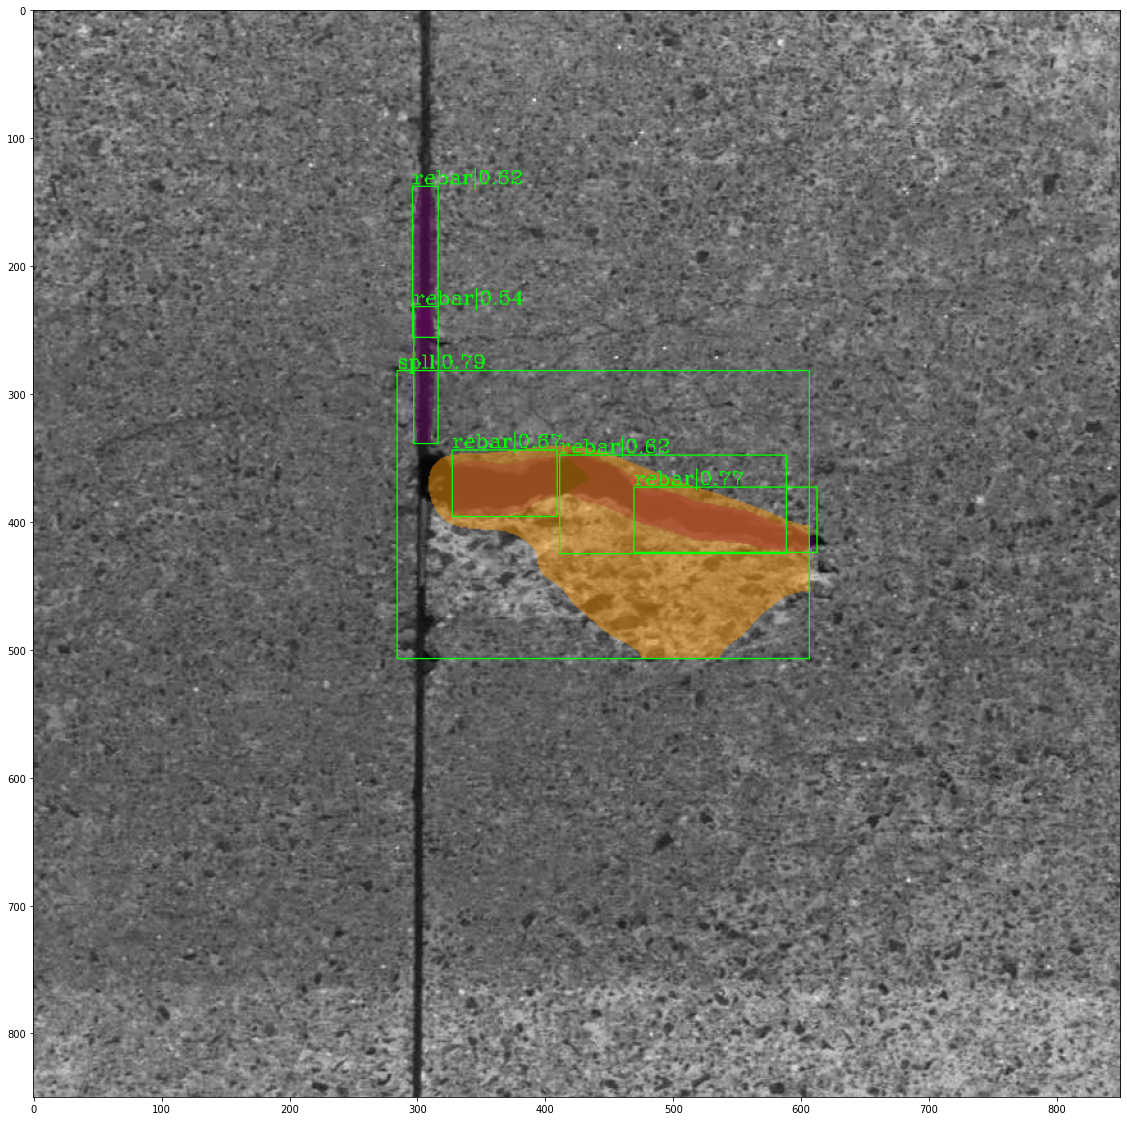

In [20]:
img = imread('/home/byunghyun/Downloads/200225_0005_53_1.jpg')

results = inference_detector(model, img)

show_result_pyplot(img, results, model.CLASSES,  score_thr=0.5, fig_size=(20, 20))

bbox_results, seg_results = results
bbox_results[2]

In [23]:
# set the path of original images 
imsave_folder = '/run/media/byunghyun/Backup Plus/시설물영상분석/신규학습자료/001. 교면/#_area_with_spalling'

# run inference with the trained network and save images that contains detection result with confidence bigger than 0.5
for root, dirs, files in os.walk('/run/media/byunghyun/Backup Plus/시설물영상분석/신규학습자료/001. 교면'):
    for file in files:
        if file.endswith(".JPG") or file.endswith(".jpg") :
#             print(os.path.join(root, file))
            img = imread(os.path.join(root, file))
            windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, 1024*4, 0.5 )
            img_num = 0
        
            for window in windows: # Can a multithreading be used here?? 
                img_num += 1 

                img_subset = img[window.indices()]
                results = inference_detector(model, img_subset)
                bbox_results, seg_results = results
                for bbox in bbox_results[3]: 
                    if bbox[-1] > 0.2:
                        filename_base, _ = os.path.splitext(file)
                        img_num_str = str(img_num)
                        img_num_str = img_num_str.zfill(3)
                        imsave_filename = filename_base + '_4000_' + img_num_str + '.jpeg'
                        imwrite(os.path.join(imsave_folder, imsave_filename), img_subset )
                        break
                
            
    

OpenCV(4.2.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:730: error: (-215:Assertion failed) !buf.empty() in function 'imdecode_'



AttributeError: 'NoneType' object has no attribute 'shape'